In [1]:
## port_2_julia_chan
## use artificial RNN i.e. LSTM to predict closing stock price using past years stock price

In [2]:
import os

#show current working directory
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'AAPL_daily.csv',
 'AF5365 Assignment 2_Thu_330 - Group7.ipynb',
 'AF5365 Midterm Exam.ipynb',
 'AF5365 Midterm Review codes.ipynb',
 'AF5365B_Jupyter Notebook_Gp7_12_7_22.03.ipynb',
 'ARKK_daily.csv',
 'Assignment 1_Chiu Lok Ka.ipynb',
 'backup_template.ipynb',
 'data1.xlsx',
 'FundRet.xlsx',
 'GOOG_daily.csv',
 'housing_data.csv',
 'PFE_daily.csv',
 'port_1_final_stock_prediction.ipynb',
 'port_2_stock_prediction_LSTM.ipynb',
 'port_3_prediction_housing_LR.ipynb',
 'port_4_stock_market_analysis + MonteCarlo.ipynb',
 'port_5_stock_prediction_LSTM.ipynb',
 'port_6_simpleLR.ipynb',
 'TSLA_daily.csv',
 'TSM_daily.csv',
 'Week 12. Big Data in Accounting and Finance.ipynb',
 'Week 2_Introduction to Scientific Computing.ipynb',
 'Week 3.ipynb',
 'Week 7.ipynb',
 'Week 9 Notebook.ipynb',
 'Week_11_Lecture.ipynb']

In [3]:
# update the working directory
os.chdir('C:\\Users\\JC\\myPortfolio')

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr

from datetime import datetime, date

import time
import math

import tensorflow
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM

In [5]:
# get stock quote
df = pdr.DataReader('TSLA','yahoo')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-02,38.624001,36.046001,38.484001,36.556000,28868000.0,36.556000
2016-02-03,36.787998,34.035999,36.717999,34.695999,39657000.0,34.695999
2016-02-04,35.195999,33.397999,34.139999,35.066002,21927000.0,35.066002
2016-02-05,34.599998,31.548000,34.259998,32.520000,47188000.0,32.520000
2016-02-08,31.430000,29.200001,31.420000,29.598000,46565000.0,29.598000
...,...,...,...,...,...,...
2021-01-25,900.400024,838.820007,855.000000,880.799988,41173400.0,880.799988
2021-01-26,895.900024,871.599976,891.380005,883.090027,23131600.0,883.090027
2021-01-27,891.500000,858.659973,870.349976,864.159973,27334000.0,864.159973


In [6]:
# get number of column and row in dataset
print(df.shape)

(1258, 6)


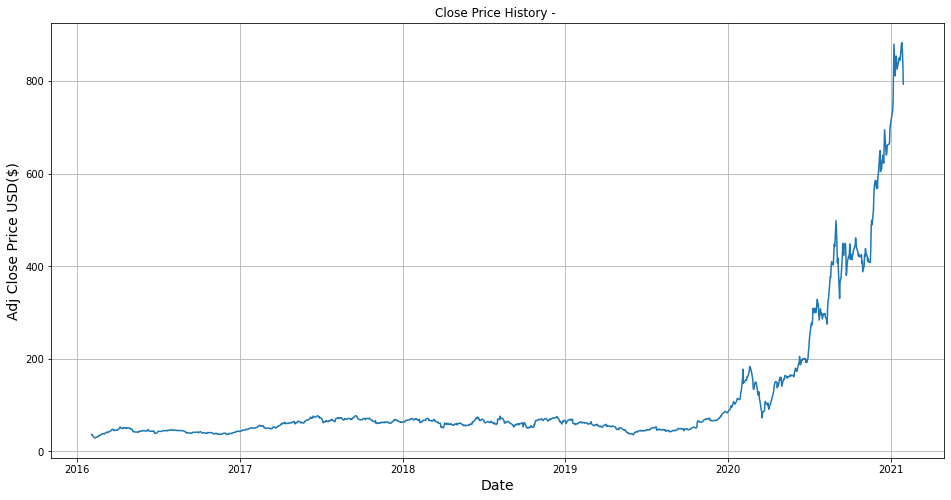

In [7]:
# visualize closing price history plots

plt.figure(figsize = (16,8))
plt.title('Close Price History - ')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Adj Close Price USD($)',fontsize = 14)
plt.grid(b=1)
plt.show()

In [8]:
# create dataframe with only close price column for analysis
data = df.filter(['Adj Close'])
print(data)

             Adj Close
Date                  
2016-02-02   36.556000
2016-02-03   34.695999
2016-02-04   35.066002
2016-02-05   32.520000
2016-02-08   29.598000
...                ...
2021-01-25  880.799988
2021-01-26  883.090027
2021-01-27  864.159973
2021-01-28  835.429993
2021-01-29  793.530029

[1258 rows x 1 columns]


In [9]:
# convert Adj Close dataframe into numpy array
dataset = data.values
dataset

array([[ 36.55599976],
       [ 34.69599915],
       [ 35.06600189],
       ...,
       [864.15997314],
       [835.42999268],
       [793.5300293 ]])

In [10]:
# get number of rows to train the model
train_data_len = math.ceil(len(dataset)*.8)#using 80:20 train test split
train_data_len

1007

In [11]:
# Data Normalization

scaler = MinMaxScaler(feature_range=(0,1)) # create min max scale object
scaled_data = scaler.fit_transform(dataset)

In [12]:
# create scaled training dataset
train_data = scaled_data[0:train_data_len,:]

#split scaled data into x_train and y_train datasets
x_train = []
y_train = []

#use past 60 days data as time step to predict close price
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [13]:
#convert x_train and y_train list to numpy arrays

x_train = np.array(x_train)
y_train = np.array(y_train)

In [14]:
# Reshape the dataset for training model LSTM
#convert to 3D array of # of rows/samples, timestep and features
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(947, 60, 1)

In [15]:
# Build LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1))) 
# set 50 neurones for LSTM layer, use another LSTM layer
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25)) # densely connected neuron layer
model.add(Dense(1))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train the model
model.fit(x_train,y_train, batch_size = 1, epochs = 1)

947/947 [==============================] - 51s 48ms/step - loss: 1.1033e-04


In [18]:
# create Testing data set
# create new array containing scaled test data values

test_data = scaled_data[train_data_len - 60: , :]

In [19]:
# create data sets x_test and y_test
x_test = []
y_test = dataset[train_data_len: ,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [20]:
# convert X test data to numpy array
x_test = np.array(x_test)

# Reshape X test data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [41]:
# get model predicted price values

prediction = model.predict(x_test)

# inverse transform to unscale the y values
prediction = scaler.inverse_transform(prediction)

In [22]:
# evaluate model performance by getting root mean squared error (RMSE)

rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

70.0745283939924

In [76]:
# Plot data using unscaled data

train = dataset[:train_data_len] #train data
valid = dataset[train_data_len:] #test data

# assign predictions to Valid dataset
#valid = np.concatenate((valid, prediction), axis=0)

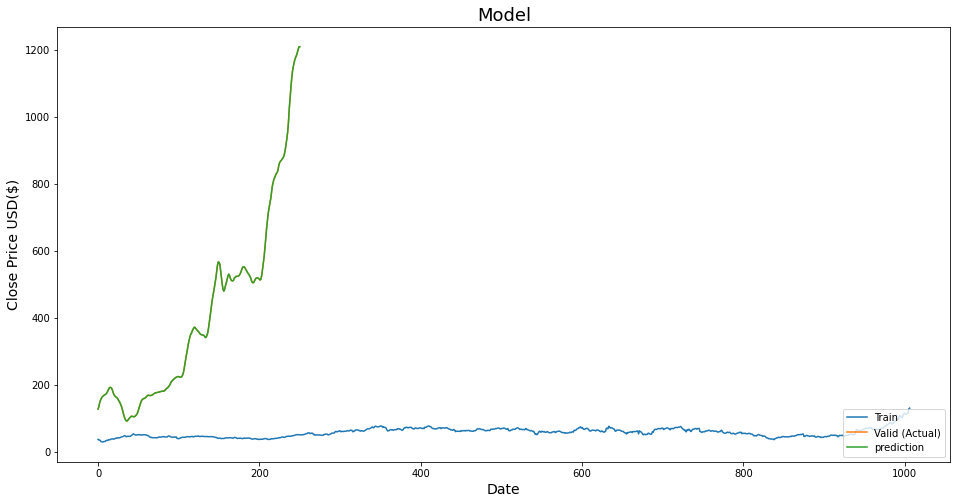

In [79]:
# Visualize data (prediction vs actual y)
plt.figure(figsize= (16,8))
plt.title('Model',fontsize = 18)

plt.xlabel('Date',fontsize = 14)
plt.ylabel('Close Price USD($)',fontsize = 14)

plt.plot(train)
plt.plot(valid)
plt.plot(prediction)

plt.legend(['Train','Valid (Actual)','prediction'], loc = 'lower right')
plt.show()

In [30]:
# show the valid & predicted values compared
print(valid)

[[ 127.23375702]
 [ 134.37609863]
 [ 145.56542969]
 [ 153.29946899]
 [ 158.79418945]
 [ 162.45643616]
 [ 165.38165283]
 [ 167.64527893]
 [ 169.07807922]
 [ 170.93119812]
 [ 172.6468811 ]
 [ 175.73722839]
 [ 180.84895325]
 [ 185.90135193]
 [ 190.39889526]
 [ 192.16253662]
 [ 191.33746338]
 [ 188.64308167]
 [ 182.42359924]
 [ 174.77760315]
 [ 169.37663269]
 [ 165.77345276]
 [ 163.62593079]
 [ 161.78404236]
 [ 159.73826599]
 [ 155.15765381]
 [ 150.86729431]
 [ 146.9066925 ]
 [ 141.52941895]
 [ 135.67700195]
 [ 127.46012115]
 [ 118.59526825]
 [ 108.55278015]
 [ 100.89615631]
 [  95.36096191]
 [  91.7702713 ]
 [  91.54831696]
 [  94.05960083]
 [  97.43611908]
 [ 100.53703308]
 [ 102.83640289]
 [ 105.07561493]
 [ 105.87264252]
 [ 105.10038757]
 [ 104.30284882]
 [ 104.56319427]
 [ 106.13109589]
 [ 108.2853775 ]
 [ 111.16160583]
 [ 116.23020935]
 [ 123.48773956]
 [ 131.61500549]
 [ 139.70649719]
 [ 147.10284424]
 [ 153.07670593]
 [ 155.93719482]
 [ 158.11946106]
 [ 158.91281128]
 [ 159.4191131

In [31]:
# get the stock quote for prediction
tsla_quote = pdr.DataReader('TSLA','yahoo')

# Create new dataframe 
new_df = tsla_quote.filter(['Adj Close'])
print(new_df)

             Adj Close
Date                  
2016-02-02   36.556000
2016-02-03   34.695999
2016-02-04   35.066002
2016-02-05   32.520000
2016-02-08   29.598000
...                ...
2021-01-25  880.799988
2021-01-26  883.090027
2021-01-27  864.159973
2021-01-28  835.429993
2021-01-29  793.530029

[1258 rows x 1 columns]


In [35]:
#get last 60 days closing price values and convert dataframe to array
last_60_days = new_df[-60:].values
    
# scale the data to values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
    
# create empty list
X_test = []

# Append past 60 days
X_test.append(last_60_days_scaled)
    
# Convert X_test data set to numpy array
X_test = np.array(X_test)
    
# Reshape data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    
# get predicted scaled price
pred_price = model.predict(X_test)
    
# undo scaling of predicted price
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1200.5266]]


In [55]:
# get the actual quote on next day

start = datetime(2021,2, 1)

end = datetime(2021,2, 1)

tsla_quote_2 = tsla_quote = pdr.DataReader('TSLA','quandl',start, end)

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.